In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classes import * 
import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
LT295ch3 = Mapping('LT295chip3_master.txt')
LT361ch4 = Mapping('LT361w2chip4_master.txt')
LT361ch7 = Mapping('LT361w2chip7_master.txt')
LT361ch9 = Mapping('LT361w2chip9_master.txt')

In [3]:
def plot_scatter(chip):
    fig, axes = plt.subplot_mosaic('abcd', constrained_layout=True, figsize=(13,3))
    ax = axes['a']
    ax.scatter(chip.fd, chip.fd, label='Design: $f_0^d$')
    ax.scatter(chip.fd, chip.fm, label='Measured: $f_0^m$')
    x = np.linspace(np.amin(chip.fd), np.amax(chip.fd), 100)
    ax.plot(x, func(x, *chip.popt), label='Corr. design: $f_0^{d^*}$', c='k', ls='--')
    ax.legend()
    min = np.nanmin((chip.fd, chip.fm))-.1
    max = np.nanmax((chip.fd, chip.fm))+.1
    xlim = [np.floor(min * 2) / 2, np.ceil(max * 2) / 2]
    ylim = xlim
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('Frequency [GHz]')
    ax.set_ylabel('Frequency [GHz]')
    ax.set_yticks(ax.get_xticks())
    ax = axes['b']
    ax.hist(chip.df_f_fit, bins='auto', label='$\sigma_f=%.1e$' % chip.std_fit, facecolor='o')
    ax.legend()
    # clim = round(np.nanmax(np.absolute(chip.df_f_fit)), 3)
    cmin = np.floor(np.nanmin(chip.df_f_fit) * 200) / 200
    cmax = np.ceil(np.nanmax(chip.df_f_fit) * 200) / 200
    ax.set_xlim([cmin, cmax])
    ax.legend()
    ax.set_xlabel('Frac. freq. error')
    ax.set_ylabel('Counts')
    ax = axes['c']
    ax.scatter(chip.fd, chip.df_f_fit, c=chip.df_f_fit, cmap='viridis', vmin=cmin, vmax=cmax, label='$\delta f/f$')
    ax.set_xlim(xlim)
    ax.set_ylim([cmin, cmax])
    ax.set_xlabel('Frequency [GHz]')
    ax.set_ylabel('Frac. freq. error')
    ax = axes['d']
    im = ax.imshow(chip.df_f_fit[chip.map], origin='lower', vmin=cmin, vmax=cmax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(-.5, chip.N-.5)
    ax.set_ylim(-.5, chip.M-.5)
    ax.grid(False, which='both')
    ax.set_xlabel('$x$ $[px]$')
    ax.set_ylabel('$y$ $[px]$')
    cbar = fig.colorbar(im, ax=ax)
    _ = cbar.ax.set_ylabel('$(f_0^m - f_0^{d^*})/f_0^{d^*}$')

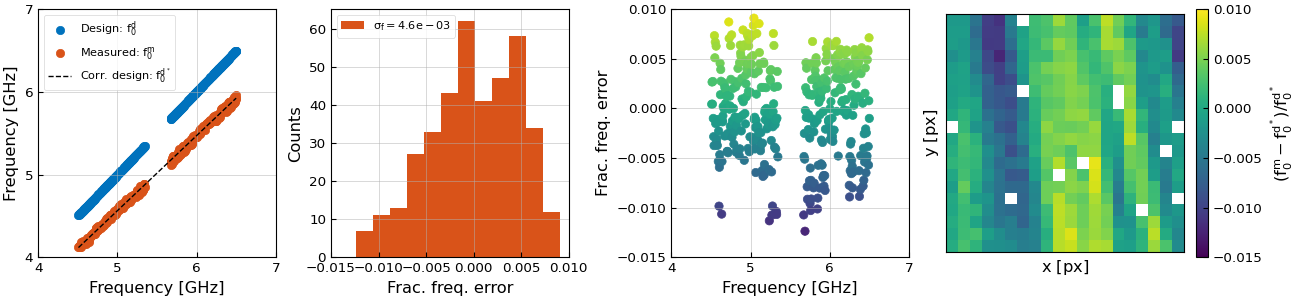

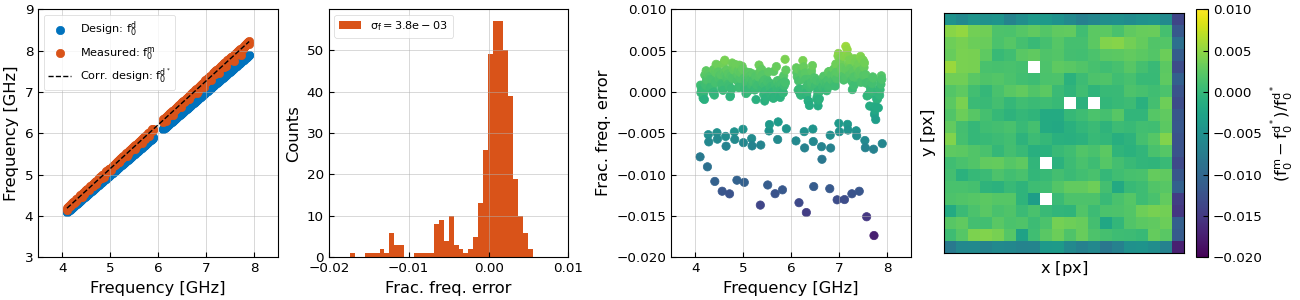

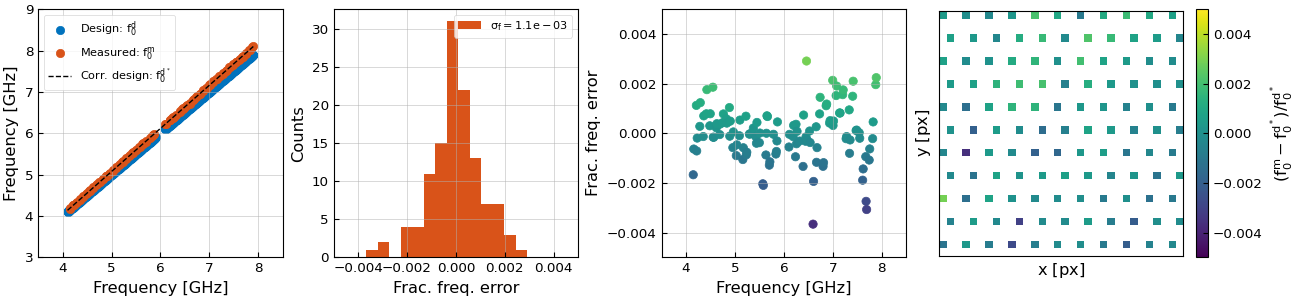

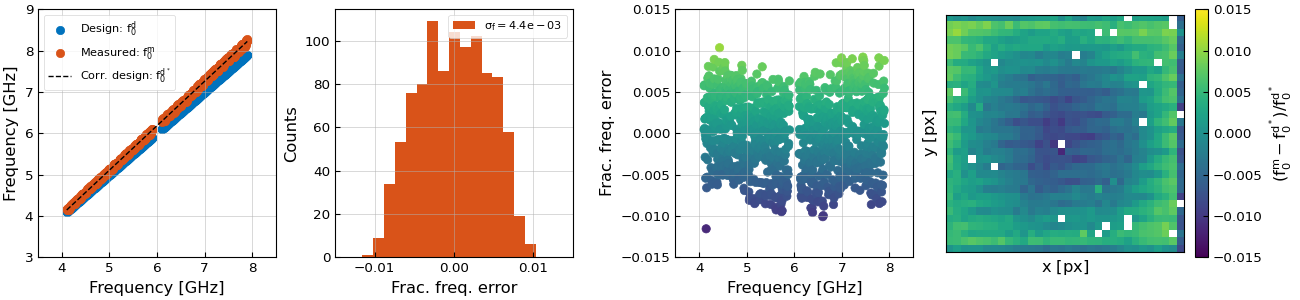

In [4]:
plot_scatter(LT295ch3)
plot_scatter(LT361ch4)
plot_scatter(LT361ch7)
plot_scatter(LT361ch9)